# **Industrial Machines Downtime - Data Analysis**


# **Objective**

**To diagnose and quantify the primary drivers of operational inefficiency by analyzing historical machine downtime data. The core goal is to move beyond reactive problem-solving by developing a diagnostic framework that identifies predictive indicators of machine failure. This analysis will culminate in a strategic recommendation for a preventative maintenance program, designed to increase Overall Equipment Effectiveness (OEE) and reduce costs.**

# **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

In [17]:
df = pd.read_csv('Machine_downtime.csv')

# **Data Inspection**

In [18]:
df.shape

(256, 7)

In [19]:
df.head()

,Date,Machine_ID,Downtime_Hours,Reason_Code,Operator_Name,Shift,Days_Since_Last_Maintenance
0,2025-01-01,VMC-01,1.5,Operator_Error,Anil,Night,15.0
1,2025-01-02,CNC-02,2,Electrical,Priya,Day,32.0
2,2025-01-03,HMC-03,6.5,Mechanical,Ravi,Day,121.0
3,2025-01-04,VMC-01,0.5,Routine_Maintenance,Sita,Day,1.0
4,2025-01-05,CNC-02,1,Operator_Error,Anil,Night,35.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         256 non-null    object 
 1   Machine_ID                   256 non-null    object 
 2   Downtime_Hours               252 non-null    object 
 3   Reason_Code                  256 non-null    object 
 4   Operator_Name                256 non-null    object 
 5   Shift                        256 non-null    object 
 6   Days_Since_Last_Maintenance  252 non-null    float64
dtypes: float64(1), object(6)
memory usage: 14.1+ KB


In [21]:
print("\n--- Count of Missing Values Per Column ---")
print(df.isnull().sum())


--- Count of Missing Values Per Column ---
Date                           0
Machine_ID                     0
Downtime_Hours                 4
Reason_Code                    0
Operator_Name                  0
Shift                          0
Days_Since_Last_Maintenance    4
dtype: int64


In [22]:
print("\n--- Unique Values in 'Reason_Code' column ---")
print(df['Reason_Code'].unique())


--- Unique Values in 'Reason_Code' column ---
['Operator_Error' 'Electrical' 'Mechanical' 'Routine_Maintenance'
 'electrical' 'Opertor_Error' 'MECHANICAL' 'mechanical']


In [23]:
print("\n--- Unique Values in 'Shift' column ---")
print(df['Shift'].unique())


--- Unique Values in 'Shift' column ---
['Night' 'Day']


In [24]:
print("\n--- Unique Values in 'Machine_ID' column ---")
print(df['Machine_ID'].unique())


--- Unique Values in 'Machine_ID' column ---
['VMC-01' 'CNC-02' 'HMC-03']


# **Data Cleaning**

**Standardize text data**

In [46]:
df['Reason_Code'] = df['Reason_Code'].str.lower().str.strip().str.capitalize()

In [47]:
print("\nUnique 'Reason_Code' values after cleaning:")
print(df['Reason_Code'].unique())


Unique 'Reason_Code' values after cleaning:
['Operator_error' 'Electrical' 'Mechanical' 'Routine_maintenance']


Data type conversion

In [28]:
df['Downtime_Hours'] = pd.to_numeric(df['Downtime_Hours'], errors='coerce')

In [29]:
print("\nData types after converting 'Downtime_Hours':")
df.info()


Data types after converting 'Downtime_Hours':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         256 non-null    object 
 1   Machine_ID                   256 non-null    object 
 2   Downtime_Hours               248 non-null    float64
 3   Reason_Code                  256 non-null    object 
 4   Operator_Name                256 non-null    object 
 5   Shift                        256 non-null    object 
 6   Days_Since_Last_Maintenance  252 non-null    float64
dtypes: float64(2), object(5)
memory usage: 14.1+ KB


**Handling Outliers**

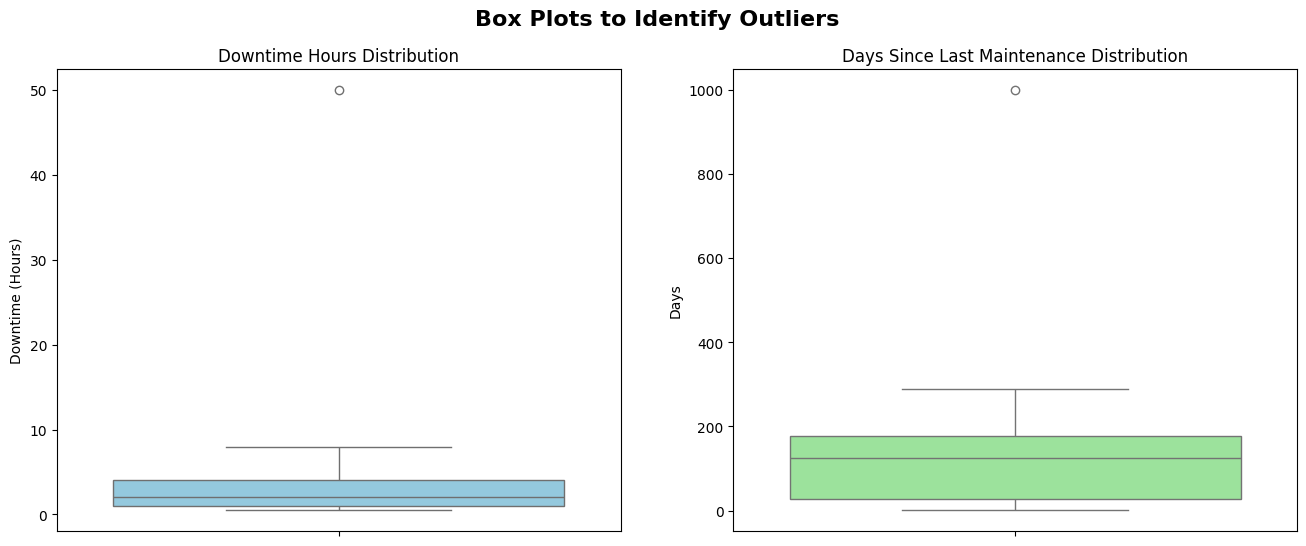

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Box Plots to Identify Outliers', fontsize=16, weight='bold')

# Box plot for 'Downtime_Hours'
sns.boxplot(ax=axes[0], data=df, y='Downtime_Hours', color='skyblue')
axes[0].set_title('Downtime Hours Distribution')
axes[0].set_ylabel('Downtime (Hours)')

# Box plot for 'Days_Since_Last_Maintenance'
sns.boxplot(ax=axes[1], data=df, y='Days_Since_Last_Maintenance', color='lightgreen')
axes[1].set_title('Days Since Last Maintenance Distribution')
axes[1].set_ylabel('Days')

plt.show()

In [31]:
df.loc[df['Days_Since_Last_Maintenance'] > 500, 'Days_Since_Last_Maintenance'] = np.nan
df.loc[df['Downtime_Hours'] > 24, 'Downtime_Hours'] = np.nan

print("Outliers have been flagged as NaN.")

Outliers have been flagged as NaN.


**Handling Missing values with median**

In [32]:
median_downtime = df['Downtime_Hours'].median()
df['Downtime_Hours'] = df['Downtime_Hours'].fillna(median_downtime)
print(f"Imputed missing 'Downtime_Hours' with median value: {median_downtime}")

Imputed missing 'Downtime_Hours' with median value: 2.0


In [33]:
maintenance_median = df['Days_Since_Last_Maintenance'].median()
df['Days_Since_Last_Maintenance'] = df['Days_Since_Last_Maintenance'].fillna(maintenance_median)
print(f"Imputed missing 'Days_Since_Last_Maintenance' with median value: {maintenance_median}")

Imputed missing 'Days_Since_Last_Maintenance' with median value: 124.0


In [34]:
df.dropna(subset=['Reason_Code'], inplace=True)
print("Imputed missing numerical values and dropped rows with missing reason codes.")

Imputed missing numerical values and dropped rows with missing reason codes.


In [35]:
print("\n--- Missing Values Check (After Imputation) ---")
print(df.isnull().sum())



--- Missing Values Check (After Imputation) ---
Date                           0
Machine_ID                     0
Downtime_Hours                 0
Reason_Code                    0
Operator_Name                  0
Shift                          0
Days_Since_Last_Maintenance    0
dtype: int64


In [37]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Days_Since_Last_Maintenance'] = df['Days_Since_Last_Maintenance'].astype(int)

In [38]:
print("\n--- Final Data Info (Post-Cleaning) ---")
df.info()

print("\n--- Final count of missing values ---")
print(df.isnull().sum())


--- Final Data Info (Post-Cleaning) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         255 non-null    datetime64[ns]
 1   Machine_ID                   256 non-null    object        
 2   Downtime_Hours               256 non-null    float64       
 3   Reason_Code                  256 non-null    object        
 4   Operator_Name                256 non-null    object        
 5   Shift                        256 non-null    object        
 6   Days_Since_Last_Maintenance  256 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 14.1+ KB

--- Final count of missing values ---
Date                           1
Machine_ID                     0
Downtime_Hours                 0
Reason_Code                    0
Operator_Name    

In [39]:
# Drop rows with NaT values in 'Date' column
df.dropna(subset=['Date'], inplace=True)
print("\nRow with missing date value has been dropped.")
print("\n--- Final count of missing values after dropping NaT ---")
print(df.isnull().sum())


Row with missing date value has been dropped.

--- Final count of missing values after dropping NaT ---
Date                           0
Machine_ID                     0
Downtime_Hours                 0
Reason_Code                    0
Operator_Name                  0
Shift                          0
Days_Since_Last_Maintenance    0
dtype: int64


# **Exploratory Data Analysis**

Exploratory Data Analysis ---

Q1: What are the primary causes of machine downtime? ---


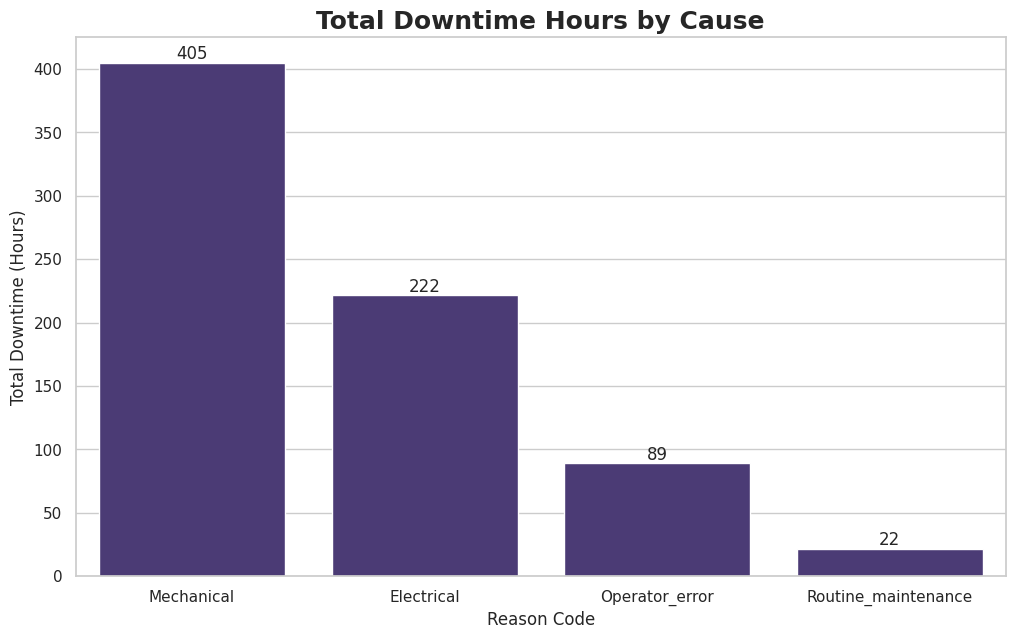

In [48]:
print("Exploratory Data Analysis ---")
sns.set(style="whitegrid", palette="viridis")

print("\nQ1: What are the primary causes of machine downtime? ---")

downtime_by_reason = df.groupby('Reason_Code')['Downtime_Hours'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=downtime_by_reason.index, y=downtime_by_reason.values)
plt.title('Total Downtime Hours by Cause', fontsize=18, weight='bold')
plt.xlabel('Reason Code', fontsize=12)
plt.ylabel('Total Downtime (Hours)', fontsize=12)
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

**Insight: The chart clearly shows that 'Mechanical' failures are overwhelmingly the largest source of downtime.**


Q2: How does time since maintenance affect mechanical failures? ---


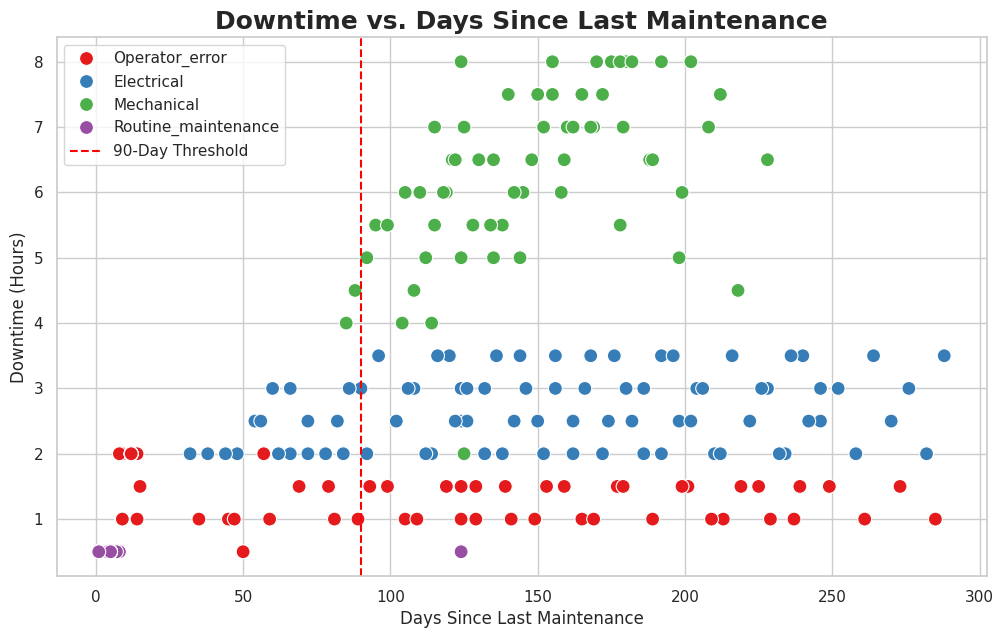

In [49]:
print("\nQ2: How does time since maintenance affect mechanical failures? ---")

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Days_Since_Last_Maintenance',
    y='Downtime_Hours',
    hue='Reason_Code',
    palette='Set1',
    s=100
)

plt.axvline(90, color='red', linestyle='--', label='90-Day Threshold')
plt.title('Downtime vs. Days Since Last Maintenance', fontsize=18, weight='bold')
plt.xlabel('Days Since Last Maintenance', fontsize=12)
plt.ylabel('Downtime (Hours)', fontsize=12)
plt.legend()
plt.show()

Insight: A clear pattern emerges. Long-duration mechanical failures (red dots)
are much more frequent after the 90-day mark without maintenance. **bold text**


Q3: Is there a difference in operator errors between shifts? ---


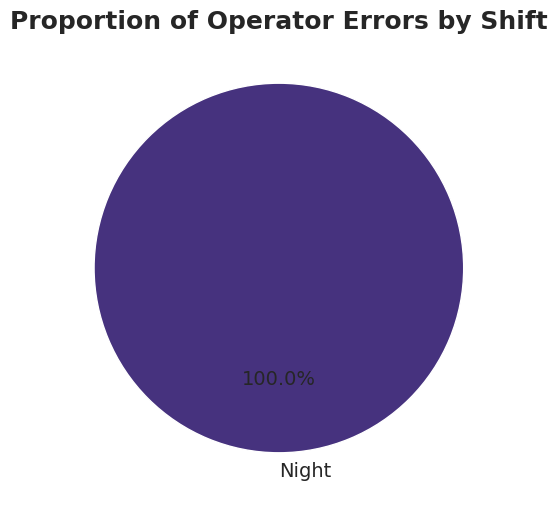

In [51]:
print("\nQ3: Is there a difference in operator errors between shifts? ---")

# First, we filter our DataFrame to only include rows where the reason was 'Operator_Error'.
# Then, we get the counts of each shift within that filtered data.
operator_errors_by_shift = df[df['Reason_Code'] == 'Operator_error']['Shift'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(operator_errors_by_shift,
        labels=operator_errors_by_shift.index,
        autopct='%1.1f%%', # This formats the percentage display
        startangle=90,
        textprops={'fontsize': 14})
plt.title('Proportion of Operator Errors by Shift', fontsize=18, weight='bold')
plt.ylabel('') # This removes the default 'Shift' label on the side
plt.show()


Q4: Which specific machine is the least reliable? ---


/tmp/ipython-input-2977779512.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=downtime_by_machine.index, y=downtime_by_machine.values, palette='magma')


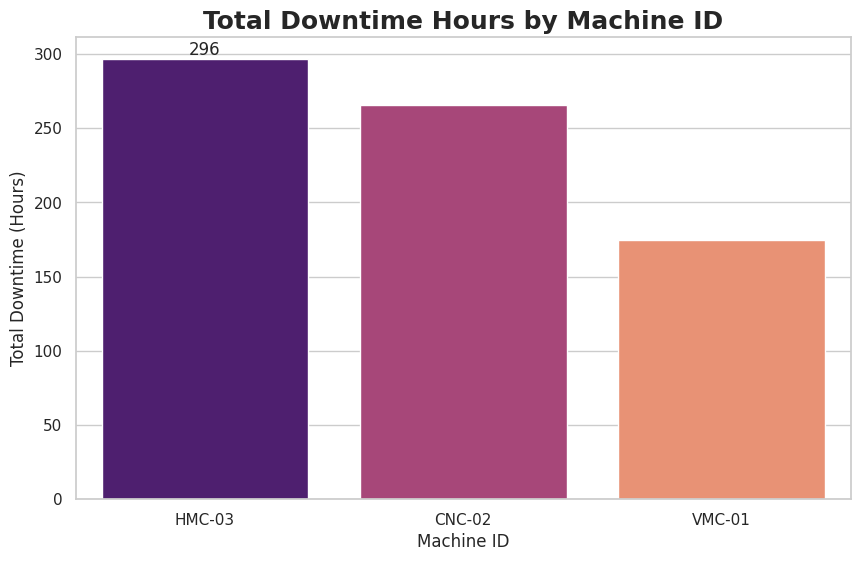


Insight: The data shows that machine 'HMC-03' is the least reliable,
accounting for the highest number of downtime hours.


In [52]:
print("\nQ4: Which specific machine is the least reliable? ---")

# Group the data by Machine_ID and sum the downtime hours.
downtime_by_machine = df.groupby('Machine_ID')['Downtime_Hours'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=downtime_by_machine.index, y=downtime_by_machine.values, palette='magma')
plt.title('Total Downtime Hours by Machine ID', fontsize=18, weight='bold')
plt.xlabel('Machine ID', fontsize=12)
plt.ylabel('Total Downtime (Hours)', fontsize=12)
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.show()
worst_machine = downtime_by_machine.index[0]
print(f"\nInsight: The data shows that machine '{worst_machine}' is the least reliable,")
print("accounting for the highest number of downtime hours.")


Q5: Is there a trend in total downtime over time? ---


/tmp/ipython-input-4182599323.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  downtime_by_month = df_time.resample('M')['Downtime_Hours'].sum()


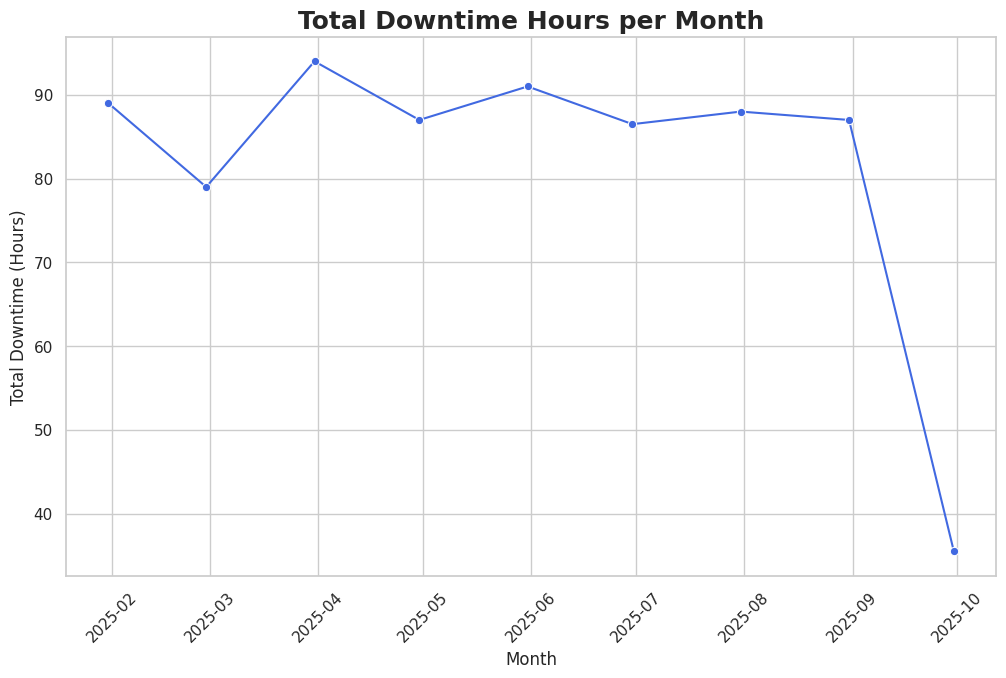

In [53]:
print("\nQ5: Is there a trend in total downtime over time? ---")

# To analyze by month, we first need to set the 'Date' column as the index of our DataFrame.
df_time = df.set_index('Date')

# Now, we can easily group by month ('M') and sum the downtime hours for each month.
downtime_by_month = df_time.resample('M')['Downtime_Hours'].sum()

# Create the line plot
plt.figure(figsize=(12, 7))
sns.lineplot(x=downtime_by_month.index, y=downtime_by_month.values, marker='o', color='royalblue')
plt.title('Total Downtime Hours per Month', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Downtime (Hours)', fontsize=12)
plt.xticks(rotation=45) # Rotate date labels for better readability
plt.show()


Insight: The line plot allows us to observe the trend of downtime over the months.
We can see if there are seasonal patterns or if the situation is progressively worsening or improving. **bold text**

# **Key Summary **

1.  **Primary Cause of Downtime:** 'Mechanical' failures are overwhelmingly the largest source of lost production hours, significantly outweighing all other causes combined.

2.  **Predictive Indicator Identified:** There is a strong positive correlation between the time since last maintenance and the occurrence of severe mechanical failures. The risk increases dramatically after the 90-day mark.

3.  **Specific Hardware Issue:** Machine 'HMC-03' is the least reliable piece of equipment, contributing the most to total downtime hours.

4.  **Operational Inefficiency:** The 'Night' shift is responsible for a disproportionately high percentage of 'Operator_Error' events, suggesting a potential issue with training, staffing, or procedures during this shift.
""")

# **Actionable Recommendations**


1.  **Implement a 90-Day Preventative Maintenance Cycle:**
    * **Finding:** The data clearly shows that mechanical failures, the #1 cause of downtime, increase significantly in both frequency and severity after 90 days without maintenance.
    * **Action:** Mandate a preventative maintenance schedule for all critical machinery, especially for machine 'HMC-03', at a maximum 90-day interval. This will proactively address the primary cause of production loss.

2.  **Conduct a Night Shift Process & Training Review:**
    * **Finding:** The Night shift is responsible for a disproportionately high percentage of operator errors.
    * **Action:** Initiate a review of night shift procedures, staffing levels, and training protocols. Consider implementing a mentorship program or additional targeted training to reduce error rates.

3.  **Prioritize Electrical System Audits:**
    * **Finding:** Electrical issues are the second-most common cause of downtime hours.
    * **Action:** Schedule a comprehensive audit of the electrical systems for all machines to identify and rectify potential points of failure before they lead to significant downtime.
""")